## Conventions 
$ \alpha_1 \rightarrow \texttt{alpha1},\quad 
\alpha_u \rightarrow \texttt{alpha_u},\quad 
\alpha_* \rightarrow \texttt{alpha_fp} $ <br>
$ \tilde{\alpha}_1 \rightarrow \texttt{Alpha1},\quad 
\tilde{\alpha}_u \rightarrow \texttt{Alpha_u},\quad 
\tilde{\alpha}_* \rightarrow \texttt{Alpha_fp} $ <br>

## Indices 
$$ \text{General index for coordinates in theory space:} \quad n = 1, \ldots, N; \quad \beta^n, g^n, \partial_n F, \partial_n \psi .$$ \
$$ \text{Index for coordinates on $S_{UV}$:} \quad \alpha = 1, \ldots, M=\text{dim}(S_{UV}); \quad \beta^{\alpha}, u^{\alpha} .$$ \
$$ \text{Index for coordinates that specify the embedding of $S_{UV}$ in $\mathbb{R}^N$:} \quad \mu = 1, \ldots, N-M; \quad \beta^{\mu}, v^{\mu}, F_{\mu}, M_{\mu}, p_{\mu} .$$ \
$$ \text{Index for the basis functions for the generating function and primary index for colocation points:} \quad i = 1, \ldots, N_p = \#\text{colocation points}; \quad \psi^i, p_i, g^{in}_{col} .$$ \
$$ \text{Secundary (Tertiary) index for colocation points:} \quad j,k = 1, \ldots, N_p = \#\text{colocation points}; \quad g^{jn}_{col}, g^{kn}_{\sim} .$$

## Objects
$$ \text{Coordinates in theory space:} \quad g^n \mapsto \{u^{\alpha}, v^{\mu} \}; \quad \text{N-dim. (0,1)-tensor} .$$ \
$$ \text{Beta functions:} \quad \beta^n: \mathbb{R}^N \mapsto \mathbb{R}^N; \quad \text{N-dim. (0,1)-tensor} .$$ \
$$ \text{Generating function:} \quad F_{\mu}: \mathbb{R}^N \mapsto \mathbb{R}^{N-M}; F_{\mu} = p_{i \mu} \psi^i \equiv (p\psi)_{\mu}; \quad \text{(N-M)-dim. (1,0)-tensor} .$$ \
$$ \text{Basis functions:} \quad \psi^i: \mathbb{R}^N \mapsto \mathbb{R}^{N_p}; \quad \text{$N_p$-dim. (0,1)-tensor} .$$ \
$$ \text{Free parameters:} \quad p_{i \mu}; \quad \text{($N_p \times$(N-M))-dim. (2,0)-tensor} .$$ \
$$ \text{Derivatives of generating function:} \quad (\partial F)_{n \mu} \equiv \partial_n F_{\mu}: \mathbb{R}^N \mapsto \mathbb{R}^N \times \mathbb{R}^{N-M}; \partial_n F_{\mu} = p_{i \mu}\partial_n \psi^i \equiv (p\partial \psi)_{n \mu}; \quad \text{(N$\times$(N-M))-dim. (2,0)-tensor} .$$ \
$$ \text{Derivatives of the basis functions:} \quad (\partial\psi)_n^i \equiv \partial_n \psi^i: \mathbb{R}^N \mapsto \mathbb{R}^N \times \mathbb{R}^{N_p}; \quad \text{(N$\times N_p$)-dim. (1,1)-tensor} .$$ \
$$ \text{Master equation:} \quad M_{\mu}: \mathbb{R}^N \mapsto \mathbb{R}^{N-M}; M_{\mu} = (\partial_n F_{\mu}) \beta^n = p_{i \mu} (\partial_n \psi^i) \beta^n; \quad \text{(N-M)-dim. (1,0)-tensor} .$$ \
$$ \text{Colocation points:} \quad g_{col}^{in}; \quad \text{($N_p\times$N)-dim. (0,2)-tensor} .$$ \
$$ \text{Most of these objects have a version specific at the fixed point, denoted by a * sub- or superscript} .$$ \
$$ \text{Alternatively, they might have a version specific to points around the fixed point, denoted by a $\sim$ sub- or superscript} .$$

In [1]:
## imports
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random as r
from itertools import product

## setup
np.set_printoptions(linewidth=160)


## Beta functions
$$ \beta^n: \mathbb{R}^N \mapsto \mathbb{R}^N, g^n = \begin{pmatrix} u^1 \\ \vdots \\ u^M \\ v^1 \\ \vdots \\ v^{N-M} \end{pmatrix} \mapsto \begin{pmatrix}  \beta^1(g^n) \\ \vdots \\ \beta^N(g^n) \end{pmatrix}  
\equiv \beta^n: \mathbb{R}^2 \mapsto \mathbb{R}^2, g^n= \begin{pmatrix} u \\ v \end{pmatrix} \mapsto \begin{pmatrix} 2u-\frac{3u^3}{2\pi (v+u)^3} \\ -\frac{u^2(7v+u)}{r\pi (v+u)^3} \end{pmatrix}  $$

In [2]:
## beta functions
def beta(g):
    return np.array([2*g[0] - 3*g[0]**3 / (2*math.pi*(g[1] + g[0])**3), -g[0]**2*(7*g[1] + g[0]) / (4*math.pi*(g[1] + g[0])**3)]) # beta[n] [!] this line is specifically 2D


## NGFP
$$ \beta^n(g^n_*) = 0 \implies \begin{pmatrix} u_* \\ v_* \end{pmatrix} = \begin{pmatrix} \frac{343}{288\pi} \\ -\frac{49}{288\pi} \end{pmatrix} \implies F_{\mu}(g^n_*)=0 $$ 

In [3]:
## NGFP (beta functions = 0)
fp = np.array([343/(288*math.pi), -49/(288*math.pi)]) # fp[n] [!] this line is specifically 2D
N = fp.size
M = 1 # [!] this line is specifically 2D


## Linear generating function and its derivatives
$$ F^*_{\mu}(g^n) = c_{n' \mu}\begin{pmatrix}g^n \\ 1\end{pmatrix}^{n'} =
\begin{pmatrix}
    c_{1,1} g^1 + c_{1,2} g^2 + \cdots + c_{1,N} g^N + c_{1,N+1} \\
    \vdots \\
    c_{N-M,1} g^1 + c_{N-M,2} g^2 + \cdots + c_{N-M,N} g^N + c_{N-M,N+1}
\end{pmatrix}^T
\equiv F^*(u,v) = (172-137\sqrt{43})u + (215+44\sqrt{43})v + \frac{49(1003\sqrt{43}-989)}{288\pi} $$ \
$$ \partial_n F^*_{\mu}(g^n) = (\partial F^*(g^n))_n = c_{n\mu} =
\begin{pmatrix}
    c_{1,1} & \cdots & c_{1,N-M} \\
    \vdots & & \vdots \\
    c_{N,1} & \cdots & c_{N,N-M}
\end{pmatrix}
\equiv (\nabla F^*(u,v))_n = \Bigg( 172-137\sqrt{43} \quad 215+44\sqrt{43} \Bigg) $$

In [4]:
## linear generating function and its derivative

c_fp = np.array([
    [172 - 137*43**0.5], 
    [215 + 44*43**0.5], 
    [49*(1003*43**0.5 - 989)/(288*math.pi)]
]) # N+1 x N-M coefficients c_fp[n',mu] [!] this line is specifically 2D

def F_fp(g): # Calculate c_fp[n',mu]*g[n'] (n' means (gn, 1))
    return np.matmul(np.append(g,[1]),c_fp) # F_fp [!] this line is specifically 2D

def dF_fp(): # Return dF_fp
    return np.array([c_fp[:-1,:]]) # dF_fp[nth derivative] [!] this line is specifically 2D


In [5]:
## generate grid of colocation points

N_cp_g = 21 # Number of colocation points in each direction g^n
N_cp = N_cp_g**N # Number of colocation points
cp_bound = 0.5 # Search space above and below fp

cps = np.array([np.linspace(gn-cp_bound, gn+cp_bound, N_cp_g) for gn in fp]) # linspaces that span space of colocation points
gg = np.array(np.meshgrid(*cps,indexing='ij')) # gg[n,n_cp_g1,...,n_cp_gn]

sigma = N_cp_g*0.5/cp_bound # smoothness factor for basis functions

def idToCoord(cp):
    # maps a 1D array of collocation point ids [0, ..., N_cp_g-1] to the coordinates on the grid
    coords = np.zeros((cp.size, N))
    for d in (range(1,N+1)):
        D = N-d
        coords[:,D] = cp - np.mod(cp, np.ones(cp.size)*N_cp_g**D)
        if D != N-1:
            for dd in range(D+1,N):
                coords[:,D] -= coords[:,dd]*N_cp_g**dd
        coords[:,D] = np.divide(coords[:,D], np.ones(cp.size)*N_cp_g**D)
        coords = coords.astype(int)
    return np.array([gg[:,coords[:,0],coords[:,1]][:,i] for i in range(0, cp.size)]) # idToCoord[ith cp, nth coord] [!] this line is specifically 2D

CP = idToCoord(np.array(list(range(0,N_cp)))) # CP[ith cp, nth coord]


## Basis functions (Multivariate Cauchy Distributions)
$$ g^{ni}_{col} = (g^{in}_{col})^T $$ \
$$ \psi^i(g^n) = \Bigg( 1 + \sum^N_n\frac{(g^n-g^{ni}_{col})^2}{\sigma^2} \Bigg)^{-1} $$ \
$$ \partial_n\psi^i(g^n) = (\partial\psi(g^n))_n^i = -\frac{2}{\sigma^2}(g^n-g^{ni}_{col})\psi^i(g^n)^2 $$

In [6]:
## Basis functions and their derivatives

CP_transpose = CP.transpose() # CP_transpose[nth coord,ith cp]

def psi(G): # G[point, nth coord]
    # divide(1, (1 + 1/sigma**2 * matmul(1, square([g,...,g]^T - CP^T)))) for all g in G
    return np.array([np.divide(np.ones(N_cp),(np.ones(N_cp) + (1/sigma**2)*np.matmul(np.ones(N),np.square(np.tile(g,(N_cp,1)).transpose() - CP_transpose)))) for g in G]) # psi[jth point,ith function]

def dpsi(G): # G[point, nth coord]
    # multiply(-2/sigma**2 * ([g,...,g]^T - CP^T) for all g in G, (tile(square(psi(CP)),(N,1,1)), axes=[1,0,2])^T)
    return np.multiply(np.array([((-2/sigma**2) * (np.tile(g,(N_cp,1)).transpose() - CP_transpose)) for g in G]), np.transpose(np.tile(np.square(psi(CP)),(N,1,1)), axes=[1,0,2])) # dpsi[jth point, nth derivative,ith function]


In [7]:
## Precaluculate up until now
pc_F_fp = np.array([F_fp(cp) for cp in CP]) # [jth point, function mu]
print(f'F:{pc_F_fp.shape}')
pc_dF_fp = dF_fp() # [function mu, nth derivative]
print(f'dF:{pc_dF_fp.shape}')
pc_psi = psi(CP) # [jth point,ith function]
print(f'psi:{pc_psi.shape}')
pc_dpsi = dpsi(CP) # [jth point, nth derivative,ith function]
print(f'dpsi:{pc_dpsi.shape}')
p = np.ones((N_cp,M)) # p[ith basis function, function mu]
print(f'p:{p.shape}')

F:(441, 1)
dF:(1, 2, 1)
psi:(441, 441)
dpsi:(441, 2, 441)
p:(441, 1)


## Fixed parameters
$$ \partial_n F_{\mu} \big|_{g^n_*} = \partial_n F^*_{\mu} \implies F_{\mu} \big|_{g_{\sim}^n} \approx F^*_{\mu} \big|_{g_{\sim}^n} $$ \
$$ \text{For one these $g_{\sim}^n$ : } p_{i \mu}\psi^i(g_{\sim}^n) \approx F^*_{\mu}(g_{\sim}^n) \implies p_{1\mu} \approx \frac{1}{\psi^1(g_{\sim}^n)}\bigg[ F^*_{\mu}(g_{\sim}^n) - \sum_{i=2}^{N_p} p_{i \mu}\psi^i(g_{\sim}^n) \bigg] $$ \
$$ \text{For $K$ of these $g^{kn}_{\sim}$ : } $$ \
$$ g^{1n}_{\sim}: \quad p_{1\mu} \approx \frac{1}{\psi^1(g^{1n}_{\sim})}\bigg[ F^*_{\mu}(g^{1n}_{\sim}) - \sum_{i=2}^{N_p} p_{i \mu}\psi^i(g^{1n}_{\sim}) \bigg] $$ \
$$ g^{2n}_{\sim}: \quad p_{2\mu} \approx \frac{1}{\psi^2(g^{2n}_{\sim})}\bigg[ F^*_{\mu}(g^{2n}_{\sim}) - p_{1\mu}\psi^1(g^{2n}_{\sim}) - \sum_{i=3}^{N_p} p_{i \mu}\psi^i(g^{2n}_{\sim}) \bigg] $$ \
$$ \vdots $$ \
$$ g^{Kn}_{\sim}: \quad p_{K\mu} \approx \frac{1}{\psi^K(g^{Kn}_{\sim})}\bigg[ F^*_{\mu}(g^{Kn}_{\sim}) - \sum_{k=1}^{K-1}p_{k\mu}\psi^k(g^{Kn}_{\sim}) - \sum_{i=K+1}^{N_p} p_{i \mu}\psi^i(g^{Kn}_{\sim}) \bigg] $$ \
$$ \text{This fixes $K \times (N-M)$ parameters $p_{i\mu}$} .$$

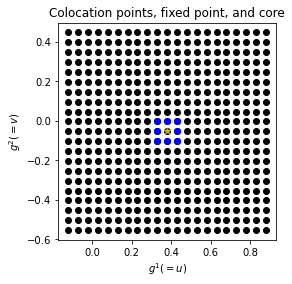

In [8]:
## Find the values for the fixed p's

# Find the id's of the 8 points directly around the fp
def findCoreIds(): # Find the id's of the 3^N-1 points directly around the fp
    perms = np.array([i for i in product([-1,0,1], repeat=N)])
    perms = np.delete(perms, int((perms.shape[0]-1)/2), 0)
    ids = np.zeros(3**N-1)
    for i in range(0,perms.shape[0]):
        for j in range(0, perms.shape[1]):
            ids[i] += N_cp_g**j*((N_cp_g-1)/2 + perms[i,j])
    return ids.astype('int')

core_ids = findCoreIds()
core_coords = idToCoord(core_ids)

# plot colocation points and core
if N == 2:
    fig_grid = plt.figure()
    ax_grid = fig_grid.add_subplot()
    plt.plot(gg[0], gg[1], marker='o', color='k', linestyle='none')
    plt.plot(fp[0], fp[1], marker='*', color='y')
    plt.plot(core_coords[:,0], core_coords[:,1], marker='o', color='b', linestyle='none')
    ax_grid.set_aspect('equal', adjustable='box')
    plt.xlabel(r'$g^1 (= u)$')
    plt.ylabel(r'$g^2 (= v)$')
    plt.title('Colocation points, fixed point, and core')
    plt.show()
    
def findFixedParameters(p): # current parameters p
    pc = np.copy(p)
    a = core_ids[0]
    for k in range(0,core_ids.size):
        kd = core_ids[k]
        pc[k,:] = 1/pc_psi[kd,k] * np.subtract(pc_F_fp[kd], np.add(np.matmul(pc_psi[kd,0:k], pc[0:k,:]), np.matmul(pc_psi[kd,k+1:], pc[k+1:,:])))
    return pc
    
p = findFixedParameters(p)
    

## Generating function
$$ F_{\mu}(g^n) = p_{i \mu} \psi^i(g^n) $$

(441, 1)


<AxesSubplot:>

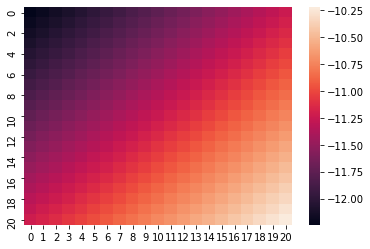

In [9]:
## Generating function

def F(G, p): # G[jth point, nth coord] p[ith function, function mu]
    return np.matmul(pc_psi, p)

print(F(CP, p).shape)    
sns.heatmap(np.array([[F(CP, p)[i+N_cp_g*j,0] for i in range(0,N_cp_g)] for j in range(0,N_cp_g)])) 